# Task 8: Clustering with K-Means

## 1.Load and visualize dataset (optional PCA for 2D view)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
from sklearn.decomposition import PCA
# Select numerical features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: PCA for 2D Visualization (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

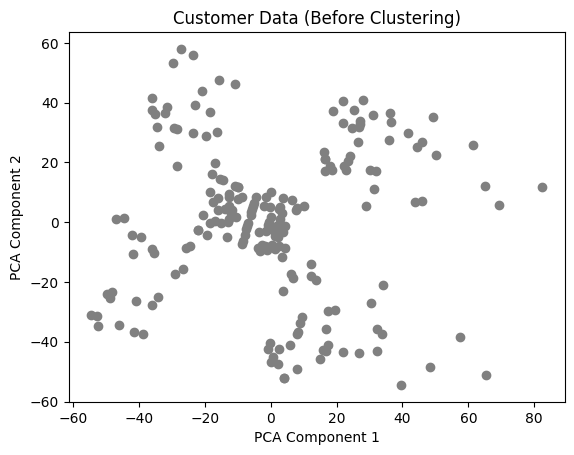

In [10]:
# Visualize the data points before clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Data (Before Clustering)")
plt.show()

##  2.Fit K-Means and assign cluster labels

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


##  3.Use the Elbow Method to find optimal K

In [12]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

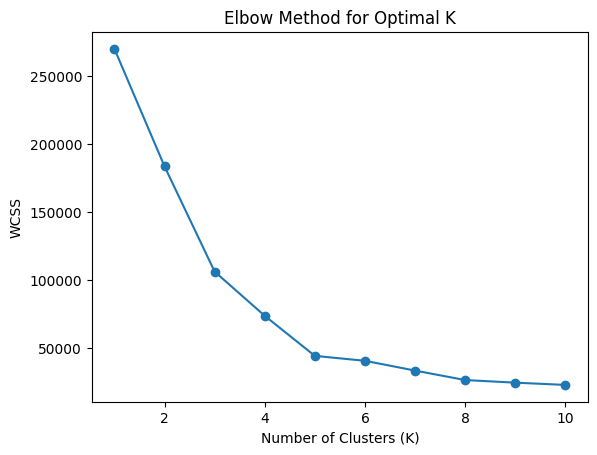

In [13]:
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

## 4.Visualize clusters with color-coding

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

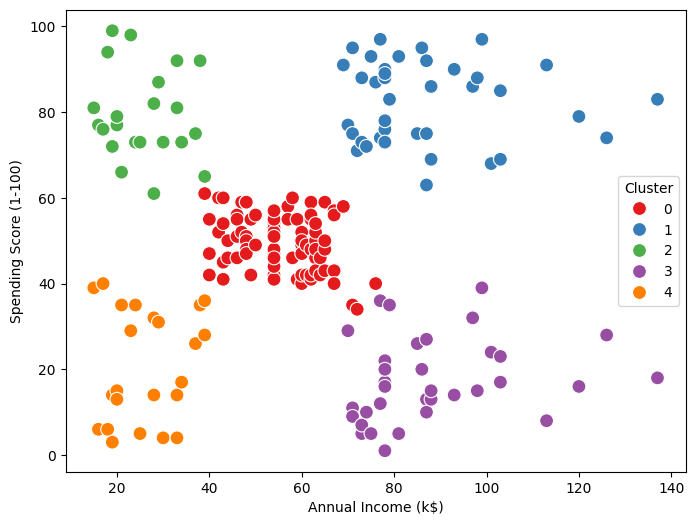

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 0],
    y=X.iloc[:, 1],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)

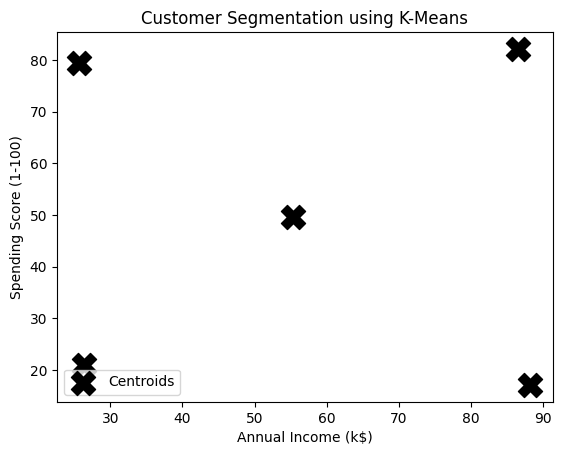

In [15]:
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300,
            c='black',
            marker='X',
            label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

##  5.Evaluate clustering using Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5539


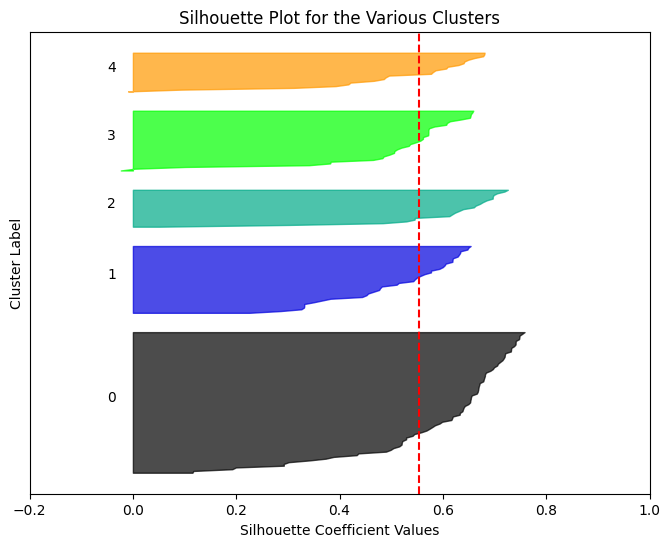

In [21]:
# Plot silhouette diagram
fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
for i in range(kmeans.n_clusters):
    # Aggregate silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # space between clusters

ax.set_title("Silhouette Plot for the Various Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# Draw a vertical line for the average silhouette score
ax.axvline(x=sil_score, color="red", linestyle="--")
ax.set_yticks([])  # no y-axis ticks
ax.set_xticks(np.linspace(-0.2, 1.0, 7))
plt.show()